In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [11]:
def get_score(context_size, model):
    disk_dir = "/mnt/data-poseidon/sumire/thesis"
    #xglm_path = f'/{src_context_size}-1/en-{lang}/xglm-{lang}-1-1/test_score.txt'
    #llama_path = f'/1-1/en-{lang}/llama-{lang}-1-1/test_score.txt'

    lang_list = os.listdir(disk_dir + f"/{context_size}")
    for id, lang in enumerate(lang_list):
        lang_list[id] = lang_list[id].replace("en-", "")
    
    lang_scores = {}

    #for model_path in [xglm_path, llama_path]:
    for lang in lang_list:
        score_path = disk_dir+f'/{context_size}/en-{lang}/{model}-{lang}-{context_size}/test_score.txt'
        if os.path.exists(score_path):
            with open(score_path,'r') as wf:
                lang_scores[lang] = wf.readlines()
                
        else:    
            lang_scores[lang] = ["bleu: 0", "comet: 0", "gen_len: 0"]
       
    #print (lang_scores) #str.replace("\n", "")

    # Sample data: replace this with your actual data
    bleu_list = []
    comet_list = []
    for score_list in lang_scores.values():
        bleu = score_list[0]
        bleu = bleu.replace("bleu: ", "")
        bleu = bleu.replace("\n", "")
        bleu = float(bleu)
        
        comet = score_list[1]
        comet = comet.replace("comet: ", "")
        comet = comet.replace("\n", "")
        comet = float(comet)
        bleu_list.append(bleu)
        comet_list.append(comet)
    return comet_list, bleu_list, lang_list


In [12]:
def get_and_return_scores(scenario, model):
    comet_list, bleu_list, lang_list = get_score(scenario, model)
    scores = {
        'model': model,
        'scenario': scenario,
        'comet_scores': comet_list,
        'bleu_scores': bleu_list,
    }
    return scores, lang_list

models = ["xglm", "llama", "Llama-2-70b-instruct-v2", "llama-p2"]
scenarios = ["1-1", "2-1", "3-1", "4-1", "5-1"]

results = []

for model in models:
    for scenario in scenarios:
        scores, lang_list = get_and_return_scores(scenario, model)
        results.append(scores)

# Now you have a list of dictionaries containing the scores for each model and scenario
# You can access the results as needed
for result in results:
    print(f"Model: {result['model']}, Scenario: {result['scenario']}")
    print(f"COMET Scores: {result['comet_scores']}")
    print(f"BLEU Scores: {result['bleu_scores']}")
    print()


Model: xglm, Scenario: 1-1
COMET Scores: [0.7372127388535029, 0.6437683624801279, 0.6951377419354833, 0.7196388349514563, 0.6694324414715717, 0.7457514376996807]
BLEU Scores: [9.58069426751592, 19.267324960254392, 6.017918709677419, 8.813881553398058, 14.72452173913043, 16.09243466453673]

Model: xglm, Scenario: 2-1
COMET Scores: [0.7277729299363057, 0.5931515103338628, 0.6875116129032257, 0.6942359223300979, 0.6609260869565214, 0.7449750798722048]
BLEU Scores: [9.188521656050964, 15.314973449920494, 5.884684193548385, 7.816133818770233, 12.854174247491631, 15.909829552715628]

Model: xglm, Scenario: 3-1
COMET Scores: [0.0, 0.5628273449920516, 0.6815887096774192, 0.0, 0.0, 0.0]
BLEU Scores: [0.0, 12.851325596184399, 5.866126774193549, 0.0, 0.0, 0.0]

Model: xglm, Scenario: 4-1
COMET Scores: [0.0, 0.5513283870967742, 0.6766374193548387, 0.0, 0.0, 0.0]
BLEU Scores: [0.0, 11.548442580645165, 5.591163548387097, 0.0, 0.0, 0.0]

Model: xglm, Scenario: 5-1
COMET Scores: [0.0, 0.53549867549668

In [4]:
print (lang_list)

['ar', 'fr', 'ja', 'ko', 'de', 'zh']


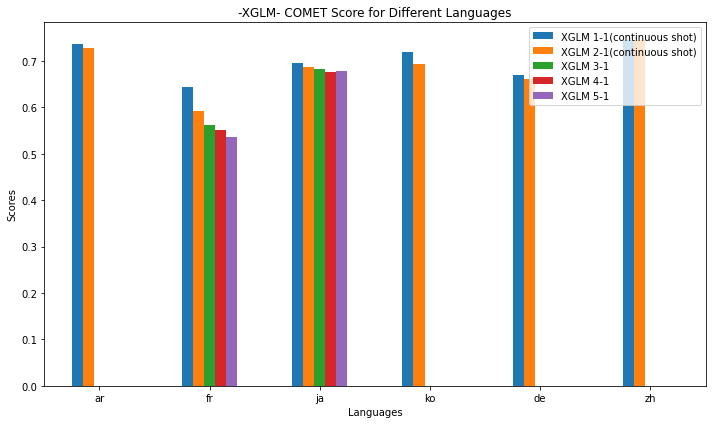

In [5]:
#XGLM 
# Generating positions for the bars
x = np.arange(len(lang_list))  # The label locations
width = 0.1  # The width of the bars

xglm_comets = []
for result in results:
    if result['model'] == 'xglm':
        xglm_comets.append(result)
#print (xglm_comets)
        
fig, ax = plt.subplots(figsize=(10, len(lang_list)))

for i in xglm_comets:
    if i['scenario'] == '1-1':
        rects1 = ax.bar(x - width*2, i["comet_scores"], width, label='XGLM 1-1(continuous shot)') # Ja, FR is not continuous shot anymore
    elif i['scenario'] == '2-1':
        rects2 = ax.bar(x - width, i["comet_scores"], width, label='XGLM 2-1(continuous shot)')
    elif i['scenario'] == '3-1':
        rects3 = ax.bar(x, i["comet_scores"], width, label='XGLM 3-1')
    elif i['scenario'] == '4-1':
        rects4= ax.bar(x + width, i["comet_scores"], width, label='XGLM 4-1')
    elif i['scenario'] == '5-1':
        rects5 = ax.bar(x + width*2, i["comet_scores"], width, label='XGLM 5-1')

# Adding labels and title
ax.set_xlabel('Languages')
ax.set_ylabel('Scores')
ax.set_title('-XGLM- COMET Score for Different Languages')
ax.set_xticks(x)
ax.set_xticklabels(lang_list)
ax.legend()

# Adjust the x-axis limits for better visualization
ax.set_xlim(-0.5, len(lang_list) - 0.5)

# Displaying the plot
plt.tight_layout()
plt.show()


[{'model': 'llama', 'scenario': '1-1', 'comet_scores': [0.49616656050955443, 0.5683147853736094, 0.5432054838709677, 0.42161197411003254, 0.46313478260869567, 0.6262217426059161], 'bleu_scores': [1.6762554140127386, 17.025433227345005, 2.8729951612903224, 0.837695792880259, 8.088846488294314, 11.798203037569937]}, {'model': 'llama', 'scenario': '2-1', 'comet_scores': [0.4882799043062207, 0.5571979332273461, 0.5260832258064516, 0.5039608414239481, 0.4736686666666666, 0.6090306155075936], 'bleu_scores': [1.9756851674641145, 14.549258187599351, 2.649922258064517, 2.1457880258899666, 8.417525999999993, 10.48124876099122]}, {'model': 'llama', 'scenario': '3-1', 'comet_scores': [0.0, 0.4878071542130367, 0.501973548387096, 0.0, 0.0, 0.0], 'bleu_scores': [0.0, 10.685326868044514, 1.4980987096774194, 0.0, 0.0, 0.0]}, {'model': 'llama', 'scenario': '4-1', 'comet_scores': [0.0, 0.47136375198728186, 0.49017741935483855, 0.0, 0.0, 0.0], 'bleu_scores': [0.0, 9.548409220985699, 1.5156190322580643, 0.

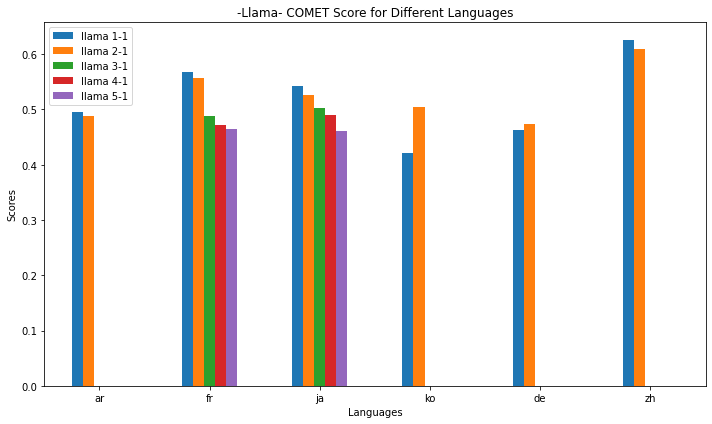

In [6]:
# Generating positions for the bars
x = np.arange(len(lang_list))  # The label locations
width = 0.1  # The width of the bars

llama_comets = []
for result in results:
    if result['model'] == 'llama':
        #xglm_comet_list = result["comet_scores"]
        #label = f"XGLM {result["scenario"]}"
        llama_comets.append(result)
        
print (llama_comets)

fig, ax = plt.subplots(figsize=(10, len(lang_list)))


for i in llama_comets:
    if i['scenario'] == '1-1':
        rects1 = ax.bar(x - width*2, i["comet_scores"], width, label='llama 1-1') # Ja, FR is not continuous shot anymore
    elif i['scenario'] == '2-1':
        rects2 = ax.bar(x - width, i["comet_scores"], width, label='llama 2-1')
    elif i['scenario'] == '3-1':
        rects3 = ax.bar(x, i["comet_scores"], width, label='llama 3-1')
    elif i['scenario'] == '4-1':
        rects4= ax.bar(x + width, i["comet_scores"], width, label='llama 4-1')
    elif i['scenario'] == '5-1':
        rects5 = ax.bar(x + width*2, i["comet_scores"], width, label='llama 5-1')



# Adding labels and title
ax.set_xlabel('Languages')
ax.set_ylabel('Scores')
ax.set_title('-Llama- COMET Score for Different Languages')
ax.set_xticks(x)
ax.set_xticklabels(lang_list)
ax.legend()

# Adjust the x-axis limits for better visualization
ax.set_xlim(-0.5, len(lang_list) - 0.5)

# Displaying the plot
plt.tight_layout()
plt.show()


[{'model': 'Llama-2-70b-instruct-v2', 'scenario': '1-1', 'comet_scores': [0.0, 0.8384652623211443, 0.81370205728, 0.0, 0.0, 0.0], 'bleu_scores': [0.0, 37.248781240063614, 13.8125401372, 0.0, 0.0, 0.0]}, {'model': 'Llama-2-70b-instruct-v2', 'scenario': '2-1', 'comet_scores': [0.0, 0.840572774244834, 0.81402492133, 0.0, 0.0, 0.0], 'bleu_scores': [0.0, 37.06951971383155, 13.9158140379, 0.0, 0.0, 0.0]}, {'model': 'Llama-2-70b-instruct-v2', 'scenario': '3-1', 'comet_scores': [0.0, 0.840528577106518, 0.8146527228721255, 0.0, 0.0, 0.0], 'bleu_scores': [0.0, 37.04631836248014, 14.035958168616366, 0.0, 0.0, 0.0]}, {'model': 'Llama-2-70b-instruct-v2', 'scenario': '4-1', 'comet_scores': [0.0, 0.8401146263910965, 0.8147077450584893, 0.0, 0.0, 0.0], 'bleu_scores': [0.0, 36.98827595389506, 13.956726421944355, 0.0, 0.0, 0.0]}, {'model': 'Llama-2-70b-instruct-v2', 'scenario': '5-1', 'comet_scores': [0.0, 0.8398509936406984, 0.8143833803953203, 0.0, 0.0, 0.0], 'bleu_scores': [0.0, 36.985733863275044, 1

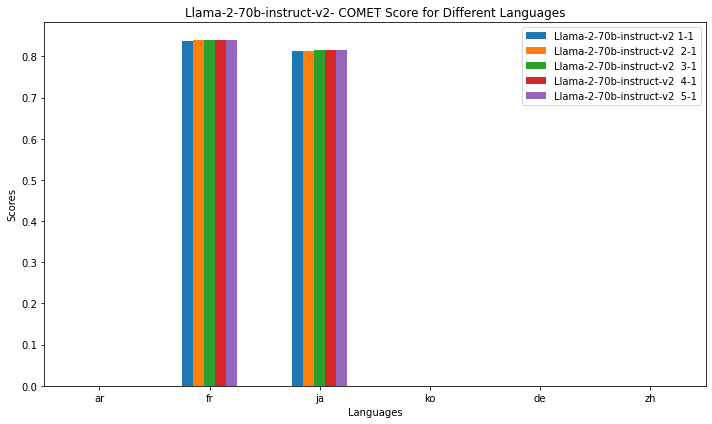

In [7]:

# Generating positions for the bars
x = np.arange(len(lang_list))  # The label locations
width = 0.1  # The width of the bars

llama_inst_comets = []
for result in results:
    if result['model'] == 'Llama-2-70b-instruct-v2':
        #xglm_comet_list = result["comet_scores"]
        #label = f"XGLM {result["scenario"]}"
        llama_inst_comets.append(result)
        
print (llama_inst_comets)

fig, ax = plt.subplots(figsize=(10, len(lang_list)))


for i in llama_inst_comets:
    if i['scenario'] == '1-1':
        rects1 = ax.bar(x - width*2, i["comet_scores"], width, label='Llama-2-70b-instruct-v2 1-1') # Ja, FR is not continuous shot anymore
    elif i['scenario'] == '2-1':
        rects2 = ax.bar(x - width, i["comet_scores"], width, label='Llama-2-70b-instruct-v2  2-1')
    elif i['scenario'] == '3-1':
        rects3 = ax.bar(x, i["comet_scores"], width, label='Llama-2-70b-instruct-v2  3-1')
    elif i['scenario'] == '4-1':
        rects4= ax.bar(x + width, i["comet_scores"], width, label='Llama-2-70b-instruct-v2  4-1')
    elif i['scenario'] == '5-1':
        rects5 = ax.bar(x + width*2, i["comet_scores"], width, label='Llama-2-70b-instruct-v2  5-1')


# Adding labels and title
ax.set_xlabel('Languages')
ax.set_ylabel('Scores')
ax.set_title('Llama-2-70b-instruct-v2- COMET Score for Different Languages')
ax.set_xticks(x)
ax.set_xticklabels(lang_list)
ax.legend()

# Adjust the x-axis limits for better visualization
ax.set_xlim(-0.5, len(lang_list) - 0.5)

# Displaying the plot
plt.tight_layout()
plt.show()


[{'model': 'llama', 'scenario': '1-1', 'comet_scores': [0.49616656050955443, 0.5683147853736094, 0.5432054838709677, 0.42161197411003254, 0.46313478260869567, 0.6262217426059161], 'bleu_scores': [1.6762554140127386, 17.025433227345005, 2.8729951612903224, 0.837695792880259, 8.088846488294314, 11.798203037569937]}, {'model': 'llama', 'scenario': '2-1', 'comet_scores': [0.4882799043062207, 0.5571979332273461, 0.5260832258064516, 0.5039608414239481, 0.4736686666666666, 0.6090306155075936], 'bleu_scores': [1.9756851674641145, 14.549258187599351, 2.649922258064517, 2.1457880258899666, 8.417525999999993, 10.48124876099122]}, {'model': 'llama', 'scenario': '3-1', 'comet_scores': [0.0, 0.4878071542130367, 0.501973548387096, 0.0, 0.0, 0.0], 'bleu_scores': [0.0, 10.685326868044514, 1.4980987096774194, 0.0, 0.0, 0.0]}, {'model': 'llama', 'scenario': '4-1', 'comet_scores': [0.0, 0.47136375198728186, 0.49017741935483855, 0.0, 0.0, 0.0], 'bleu_scores': [0.0, 9.548409220985699, 1.5156190322580643, 0.

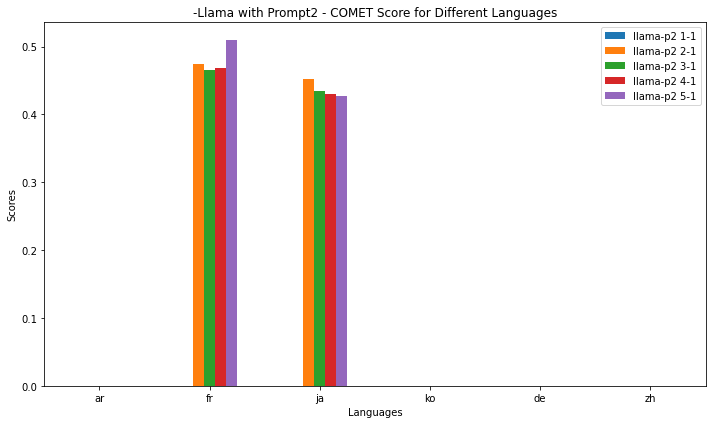

In [13]:
# Generating positions for the bars
x = np.arange(len(lang_list))  # The label locations
width = 0.1  # The width of the bars

llama_p2_comets = []
for result in results:
    if result['model'] == 'llama-p2':
        #xglm_comet_list = result["comet_scores"]
        #label = f"XGLM {result["scenario"]}"
        llama_p2_comets.append(result)
        
print (llama_comets)

fig, ax = plt.subplots(figsize=(10, len(lang_list)))


for i in llama_p2_comets:
    if i['scenario'] == '1-1':
        rects1 = ax.bar(x - width*2, i["comet_scores"], width, label='llama-p2 1-1') # Ja, FR is not continuous shot anymore
    elif i['scenario'] == '2-1':
        rects2 = ax.bar(x - width, i["comet_scores"], width, label='llama-p2 2-1')
    elif i['scenario'] == '3-1':
        rects3 = ax.bar(x, i["comet_scores"], width, label='llama-p2 3-1')
    elif i['scenario'] == '4-1':
        rects4= ax.bar(x + width, i["comet_scores"], width, label='llama-p2 4-1')
    elif i['scenario'] == '5-1':
        rects5 = ax.bar(x + width*2, i["comet_scores"], width, label='llama-p2 5-1')



# Adding labels and title
ax.set_xlabel('Languages')
ax.set_ylabel('Scores')
ax.set_title('-Llama with Prompt2 - COMET Score for Different Languages')
ax.set_xticks(x)
ax.set_xticklabels(lang_list)
ax.legend()

# Adjust the x-axis limits for better visualization
ax.set_xlim(-0.5, len(lang_list) - 0.5)

# Displaying the plot
plt.tight_layout()
plt.show()


# BLEU

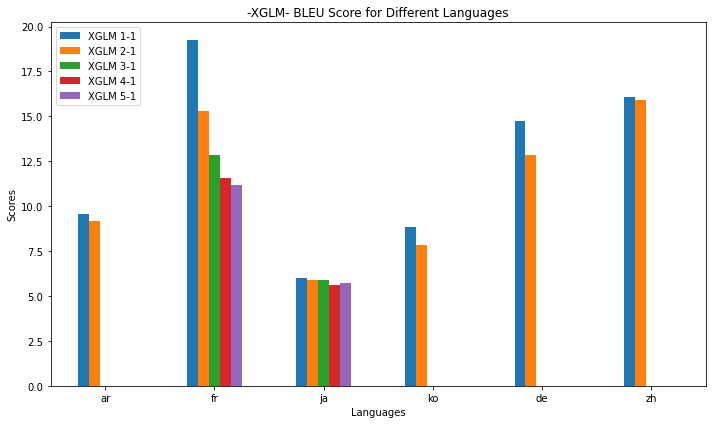

In [14]:
#XGLM 
# Generating positions for the bars

xglm_bleus = []
for result in results:
    if result['model'] == 'xglm':
        xglm_bleus.append(result)
        
x = np.arange(len(lang_list))  # The label locations
width = 0.1  # The width of the bars

fig, ax = plt.subplots(figsize=(10, len(lang_list)))
for i in xglm_comets:
    if i['scenario'] == '1-1':
        rects1 = ax.bar(x - width*2, i["bleu_scores"], width, label='XGLM 1-1') # Ja, FR is not continuous shot anymore
    elif i['scenario'] == '2-1':
        rects2 = ax.bar(x - width, i["bleu_scores"], width, label='XGLM 2-1')
    elif i['scenario'] == '3-1':
        rects3 = ax.bar(x, i["bleu_scores"], width, label='XGLM 3-1')
    elif i['scenario'] == '4-1':
        rects4= ax.bar(x + width, i["bleu_scores"], width, label='XGLM 4-1')
    elif i['scenario'] == '5-1':
        rects5 = ax.bar(x + width*2, i["bleu_scores"], width, label='XGLM 5-1')


# Adding labels and title
ax.set_xlabel('Languages')
ax.set_ylabel('Scores')
ax.set_title('-XGLM- BLEU Score for Different Languages')
ax.set_xticks(x)
ax.set_xticklabels(lang_list)
ax.legend()

# Adjust the x-axis limits for better visualization
ax.set_xlim(-0.5, len(lang_list) - 0.5)

# Displaying the plot
plt.tight_layout()
plt.show()


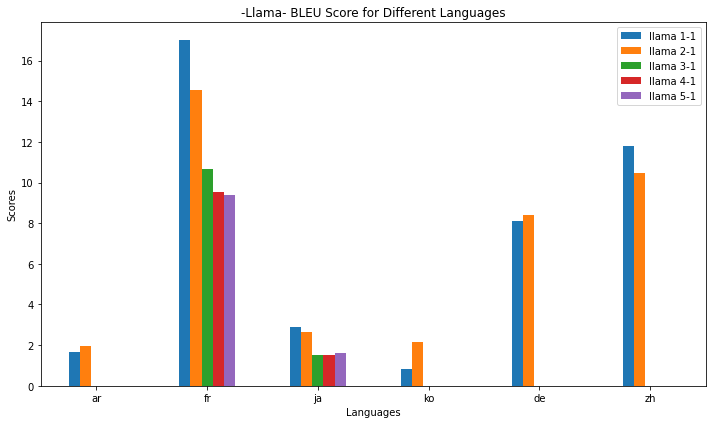

In [14]:
# Generating positions for the bars
x = np.arange(len(lang_list))  # The label locations
width = 0.1  # The width of the bars

llama_bleus = []
for result in results:
    if result['model'] == 'llama':
        #xglm_comet_list = result["comet_scores"]
        #label = f"XGLM {result["scenario"]}"
        llama_bleus.append(result)
        

fig, ax = plt.subplots(figsize=(10, len(lang_list)))


for i in llama_bleus:
    if i['scenario'] == '1-1':
        rects1 = ax.bar(x - width*2, i["bleu_scores"], width, label='llama 1-1') # Ja, FR is not continuous shot anymore
    elif i['scenario'] == '2-1':
        rects2 = ax.bar(x - width, i["bleu_scores"], width, label='llama 2-1')
    elif i['scenario'] == '3-1':
        rects3 = ax.bar(x, i["bleu_scores"], width, label='llama 3-1')
    elif i['scenario'] == '4-1':
        rects4= ax.bar(x + width, i["bleu_scores"], width, label='llama 4-1')
    elif i['scenario'] == '5-1':
        rects5 = ax.bar(x + width*2, i["bleu_scores"], width, label='llama 5-1')



# Adding labels and title
ax.set_xlabel('Languages')
ax.set_ylabel('Scores')
ax.set_title('-Llama- BLEU Score for Different Languages')
ax.set_xticks(x)
ax.set_xticklabels(lang_list)
ax.legend()

# Adjust the x-axis limits for better visualization
ax.set_xlim(-0.5, len(lang_list) - 0.5)

# Displaying the plot
plt.tight_layout()
plt.show()


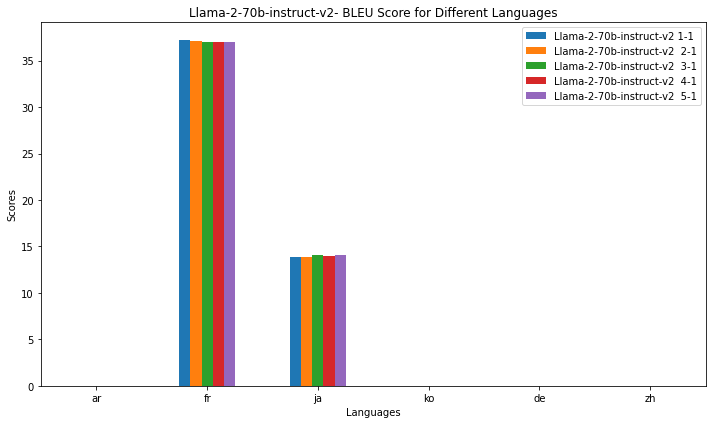

In [15]:
# Generating positions for the bars
x = np.arange(len(lang_list))  # The label locations
width = 0.1  # The width of the bars

llama_inst_bleus = []
for result in results:
    if result['model'] == 'Llama-2-70b-instruct-v2':
        #xglm_comet_list = result["comet_scores"]
        #label = f"XGLM {result["scenario"]}"
        llama_inst_bleus.append(result)

fig, ax = plt.subplots(figsize=(10, len(lang_list)))


for i in llama_inst_bleus:
    if i['scenario'] == '1-1':
        rects1 = ax.bar(x - width*2, i["bleu_scores"], width, label='Llama-2-70b-instruct-v2 1-1') # Ja, FR is not continuous shot anymore
    elif i['scenario'] == '2-1':
        rects2 = ax.bar(x - width, i["bleu_scores"], width, label='Llama-2-70b-instruct-v2  2-1')
    elif i['scenario'] == '3-1':
        rects3 = ax.bar(x, i["bleu_scores"], width, label='Llama-2-70b-instruct-v2  3-1')
    elif i['scenario'] == '4-1':
        rects4= ax.bar(x + width, i["bleu_scores"], width, label='Llama-2-70b-instruct-v2  4-1')
    elif i['scenario'] == '5-1':
        rects5 = ax.bar(x + width*2, i["bleu_scores"], width, label='Llama-2-70b-instruct-v2  5-1')


# Adding labels and title
ax.set_xlabel('Languages')
ax.set_ylabel('Scores')
ax.set_title('Llama-2-70b-instruct-v2- BLEU Score for Different Languages')
ax.set_xticks(x)
ax.set_xticklabels(lang_list)
ax.legend()

# Adjust the x-axis limits for better visualization
ax.set_xlim(-0.5, len(lang_list) - 0.5)

# Displaying the plot
plt.tight_layout()
plt.show()


[{'model': 'llama-p2', 'scenario': '1-1', 'comet_scores': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'bleu_scores': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}, {'model': 'llama-p2', 'scenario': '2-1', 'comet_scores': [0.0, 0.4744133545310014, 0.4522009677419354, 0.0, 0.0, 0.0], 'bleu_scores': [0.0, 9.636974085850557, 1.6370864516129033, 0.0, 0.0, 0.0]}, {'model': 'llama-p2', 'scenario': '3-1', 'comet_scores': [0.0, 0.46596534181240024, 0.43390758064516227, 0.0, 0.0, 0.0], 'bleu_scores': [0.0, 8.640644833068368, 1.4684443548387096, 0.0, 0.0, 0.0]}, {'model': 'llama-p2', 'scenario': '4-1', 'comet_scores': [0.0, 0.46861271860095366, 0.43074709677419354, 0.0, 0.0, 0.0], 'bleu_scores': [0.0, 8.407527344992062, 1.2710648387096777, 0.0, 0.0, 0.0]}, {'model': 'llama-p2', 'scenario': '5-1', 'comet_scores': [0.0, 0.5101170111287758, 0.42712258064516107, 0.0, 0.0, 0.0], 'bleu_scores': [0.0, 11.43930174880762, 1.2889925806451616, 0.0, 0.0, 0.0]}]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


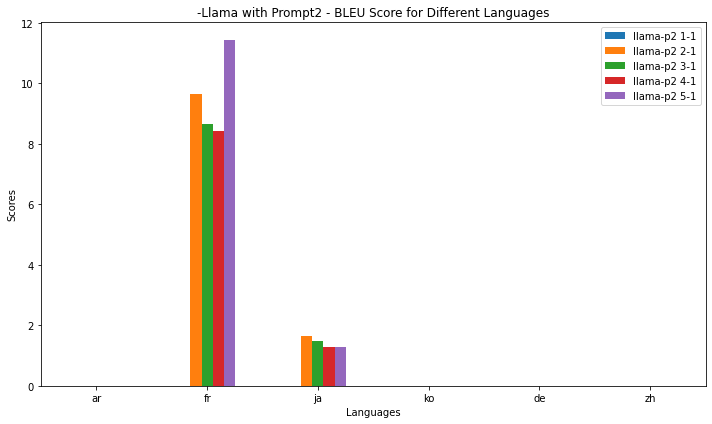

In [15]:
# Generating positions for the bars
x = np.arange(len(lang_list))  # The label locations
width = 0.1  # The width of the bars

llama_p2_bleus = []
for result in results:
    if result['model'] == 'llama-p2':
        #xglm_comet_list = result["comet_scores"]
        #label = f"XGLM {result["scenario"]}"
        llama_p2_bleus.append(result)

fig, ax = plt.subplots(figsize=(10, len(lang_list)))

print (llama_p2_bleus)

for i in llama_p2_bleus:
    if i['scenario'] == '1-1':
        rects1 = ax.bar(x - width*2, i["bleu_scores"], width, label='llama-p2 1-1') # Ja, FR is not continuous shot anymore
        print (i["bleu_scores"])
    elif i['scenario'] == '2-1':
        rects2 = ax.bar(x - width, i["bleu_scores"], width, label='llama-p2 2-1')
    elif i['scenario'] == '3-1':
        rects3 = ax.bar(x, i["bleu_scores"], width, label='llama-p2 3-1')
    elif i['scenario'] == '4-1':
        rects4= ax.bar(x + width, i["bleu_scores"], width, label='llama-p2 4-1')
    elif i['scenario'] == '5-1':
        rects5 = ax.bar(x + width*2, i["bleu_scores"], width, label='llama-p2 5-1')



# Adding labels and title
ax.set_xlabel('Languages')
ax.set_ylabel('Scores')
ax.set_title('-Llama with Prompt2 - BLEU Score for Different Languages')
ax.set_xticks(x)
ax.set_xticklabels(lang_list)
ax.legend()

# Adjust the x-axis limits for better visualization
ax.set_xlim(-0.5, len(lang_list) - 0.5)

# Displaying the plot
plt.tight_layout()
plt.show()
